<a href="https://colab.research.google.com/github/MarkoArsenovic/PPPO2021/blob/main/Vezbe12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Vežbe 12** Prepoznavanje fotografija II

## Sadržaj

1. Uvod
2. Automatsko titlovovanje fotografija sa CNN-om i LSTM-om
3. Generisanje fotografija pomoću GAN-a
4. Korišćenje ograničene Boltzmannove mašine za rekonstrukciju MNIST fotografija





### Uvod

Razmotrićemo primenu nekoliko naprednih tehnika mašinskog učenja i dubokog učenja za rešavanje nekoliko naprednih problema obrade fotografija.
- Započećemo sa problemom prepoznavanja lica koji pokušava da uporedi niz lica otkrivenih na fotografiji sa fiksnim skupom poznatih lica koristeći prikaze lica. 
- Zatim ćemo koristiti nekoliko modela dubokog učenja za rešavanje problema, poput prepoznavanja starosti ili pola ljudskog lica i automatskog obojenja fotografije u sivim skalama.
- Još jedan zanimljiv problem koji ćemo razmotriti je automatsko postavljanje titlova na fotografije pomoću modela dubokog učenja pod nazivom **im2txt**. 
- Na kraju ćemo se koncentrisati na nekoliko tehnika za generisanje fotografija. Konkretno, fokusiraćemo se na generativne modele u obradi fotografija (na primer, GAN, VAE i RBM). Pojam generativni modeli (često nasuprot diskriminativnim modelima, kao što su SVM-ovi/logistička regresija) odnosi se na klasu modela mašinskog učenja/dubokog učenja koji pokušava da modelira generisanje ili distribuciju ulaznih podataka (na primer, fotografija) učenjem probabilističkog modela. Cilj je generisanje novih podataka (fotografija) uzorkovanjem iz naučenog modela.


Učitavanje dataseta potrebnog za ove vežbe
- učitati images.zip
- učitati models.zip

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=14qsYO-YkjKtX79MM6PYGZPJgDFBFQMml' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=14qsYO-YkjKtX79MM6PYGZPJgDFBFQMml" -O images.zip && rm -rf /tmp/cookies.txt

--2021-05-24 16:26:53--  https://docs.google.com/uc?export=download&confirm=kI7D&id=14qsYO-YkjKtX79MM6PYGZPJgDFBFQMml
Resolving docs.google.com (docs.google.com)... 74.125.23.139, 74.125.23.102, 74.125.23.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.23.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-6g-docs.googleusercontent.com/docs/securesc/71abevaq36tv10tgff91886ktthv4ju6/24tfr1ku88or7dslspankhh5q490o58d/1621873575000/07050430151874469418/13862617805017673029Z/14qsYO-YkjKtX79MM6PYGZPJgDFBFQMml?e=download [following]
--2021-05-24 16:26:54--  https://doc-0s-6g-docs.googleusercontent.com/docs/securesc/71abevaq36tv10tgff91886ktthv4ju6/24tfr1ku88or7dslspankhh5q490o58d/1621873575000/07050430151874469418/13862617805017673029Z/14qsYO-YkjKtX79MM6PYGZPJgDFBFQMml?e=download
Resolving doc-0s-6g-docs.googleusercontent.com (doc-0s-6g-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PZv2l2at4wu1jcrqEBCBCkksx0COj6_-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1PZv2l2at4wu1jcrqEBCBCkksx0COj6_-" -O models.zip && rm -rf /tmp/cookies.txt

--2021-05-24 16:27:09--  https://docs.google.com/uc?export=download&confirm=ukat&id=1PZv2l2at4wu1jcrqEBCBCkksx0COj6_-
Resolving docs.google.com (docs.google.com)... 64.233.189.139, 64.233.189.100, 64.233.189.113, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-8s-docs.googleusercontent.com/docs/securesc/g7rilr0jum5vr9cv0c7j0rq33a6ctcig/ljufp1vmovrgnrt7m49f1ngbuds3i9sd/1621873575000/07050430151874469418/05237917165790590441Z/1PZv2l2at4wu1jcrqEBCBCkksx0COj6_-?e=download [following]
--2021-05-24 16:27:09--  https://doc-0s-8s-docs.googleusercontent.com/docs/securesc/g7rilr0jum5vr9cv0c7j0rq33a6ctcig/ljufp1vmovrgnrt7m49f1ngbuds3i9sd/1621873575000/07050430151874469418/05237917165790590441Z/1PZv2l2at4wu1jcrqEBCBCkksx0COj6_-?e=download
Resolving doc-0s-8s-docs.googleusercontent.com (doc-0s-8s-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connectin

Unzip dataseta

In [ ]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Numta/training-e/e11778.png  
  inflating: images/Numta/training-e/e11779.png  
  inflating: images/Numta/training-e/e11780.png  
  inflating: images/Numta/training-e/e11781.png  
 extracting: images/Numta/training-e/e11782.png  
 extracting: images/Numta/training-e/e11783.png  
  inflating: images/Numta/training-e/e11784.png  
  inflating: images/Numta/training-e/e11785.png  
  inflating: images/Numta/training-e/e11786.png  
  inflating: images/Numta/training-e/e11787.png  
  inflating: images/Numta/training-e/e11788.png  
 extracting: images/Numta/training-e/e11789.png  
  inflating: images/Numta/training-e/e11790.png  
  inflating: images/Numta/training-e/e11791.png  
 extracting: images/Numta/training-e/e11792.png  
  inflating: images/Numta/training-e/e11793.png  
  inflating: images/Numta/training-e/e11794.png  
  inflating: images/Numta/training-e/e11795.png  
  inflating: images/Numta/training-e/e11796.png  

In [ ]:
!unzip models.zip

Archive:  models.zip
   creating: models/
  inflating: models/6-mathematicians-embeddings.npz  
  inflating: models/colorization_deploy_v2.prototxt  
  inflating: models/facenet_keras.h5  
   creating: models/im2txt/
   creating: models/im2txt/cpt/
  inflating: models/im2txt/cpt/graph.pbtxt  
  inflating: models/im2txt/cpt/model.ckpt-2000000  
  inflating: models/im2txt/cpt/model.ckpt-2000000.meta  
  inflating: models/im2txt/cpt/model2.ckpt-2000000.index  
  inflating: models/im2txt/cpt/word_counts.txt  
   creating: models/im2txt/data/
   creating: models/im2txt/inference_utils/
 extracting: models/im2txt/inference_utils/__init__.py  
   creating: models/im2txt/ops/
 extracting: models/im2txt/__init__.py  
  inflating: models/model.json       
  inflating: models/model_5-49-0.62.hdf5  
  inflating: models/pts_in_hull.npy  
  inflating: models/shape_predictor_68_face_landmarks.dat  
 extracting: models/__init__.py      


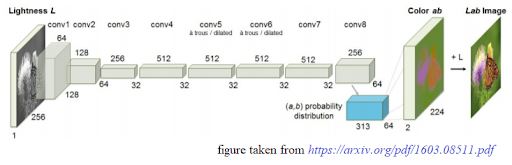

### Automatic Image Captioning  with Deep Learning Model (CNN & LSTM) // Automatsko titlovovanje fotografija sa CNN-om i LSTM-om

Automatsko postavljanje natpisa fotografije je popularan problem u AI koji povezuje obradu fotografije i računarsku viziju sa NLP-om (NLP - *Natural Language Processing*). Predstavićemo kako se koristi unapred obučeni generativni model (poznat kao *Show and Tell*) zasnovan na duboko ponavljajućoj arhitekturi neuronske mreže koja se može koristiti za generisanje opisa (kompletne rečenice na prirodnom jeziku koje opisuju sadržaj fotografije). Model je obučen sa ciljem da se maksimizira verovatnoća unosa tekstova natpisa s obzirom na ulazne fotografije za trening.

*im2txt* je implementacija *TensorFlow* modela *Show and Tell* koja može uzimati fotografije kao ulaz i generisati natpise slične čoveku koji opisuju fotografiju. Model je testiran na više od 300.000 fotografija. Model je duboka neuronska mreža *end-to-end* koja se sastoji od CNN-a (koji se koristi za učenje implicitnih karakteristika ulazne fotografije), a zatim RNN-a (koristi se za generisanje opisa kada se daju CNN-ove karakteristike). Implementacija koristi *BeamSearch* za iterativni odabir najboljih *x* opisa za ulaznu fotografiju. Sledeći dijagram prikazuje arhitekturu modela *Show and Tell*:


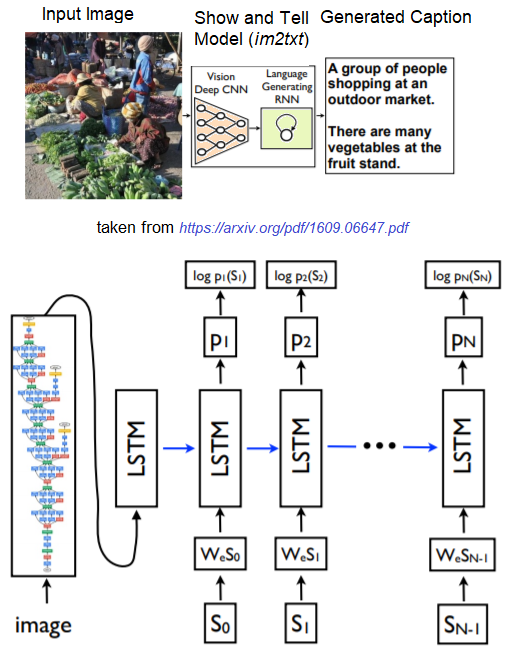

- Funkcija *build_graph_from_config()* pravi graf zaključka iz konfiguracionog objekta. Potreban je objekat konfiguracije modela koji sadrži konfiguraciju za izgradnju modela i putanja kontrolne tačke koja sadrži datoteku kontrolne tačke. Vraća funkciju koja se može koristiti za učitavanje varijabli modela iz datoteke kontrolne tačke.

- Funkcija *beam_search()* pokreće generisanje opisa pretraživanja na jednoj fotografiji. Prihvata objekat sesije *TensorFlow* i CNN kodiran niz fotografija kao ulaz i vraća listu natpisa sortiranih po opadajućem rezultatu.

- Pogledajte *caption_generator.pi* za opis dostupnih parametara pretraživanja.

Pogledati primere:
 

*   [22_Image_Captioning](https://colab.research.google.com/github/Hvass-Labs/TensorFlow-Tutorials/blob/master/22_Image_Captioning.ipynb#scrollTo=Vf9AAQ8DNgAl)
*   [image_captioning](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/text/image_captioning.ipynb)
*   [develop-a-deep-learning-caption-generation-model-in-python](https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/)




### Generative Adeverserial Network (GAN) to generate images // Generisanje fotografija pomoću GAN-a


Generativna kontradiktorna mreža (GAN) je generativni model koji definiše kontradiktorni mrežni okvir i sastoji se od nekoliko modela (oba modela su CNN-ovi), naime generator i diskriminator, s ciljem stvaranja novih realističnih fotografija kada je dat skup trening fotografija. Ova dva modela deluju međusobno kao "protivnici": generator uči da generiše nove lažne fotografije koje izgledaju kao stvarne fotografije (počevši od *random* šumova), dok diskriminator uči da utvrdi da li je uzorak stvarna ili lažna fotografija.

Generator igra ulogu “falsifikatora” koji pokušava stvoriti lažnu fotografiju i zavarati diskriminatora, dok diskriminator igra ulogu “policije” koja pokušava otkriti lažnu fotografiju koju generiše diskriminator. Možemo ovo zamisliti kao igru za dva igrača, a takmičenje u ovoj igri tera oba tima da poboljšaju svoje metode sve dok se lažne fotografije ne razlikuju od stvarnih fotografija (npr. *Nash*-ova ravnoteža između diskriminatora i protivnika generatora). 

Kada se obuka završi, nova ogledna fotografija (nalik stvarnoj fotografiji) može se generisati samo pokretanjem širenja unapred na generatoru. Oba CNN modela pokušavaju da optimizuju funkcije protivnih ciljeva (gubitaka) u igri sa nultim zbirom. Sledeći dijagram opisuje osnovni GAN okvir i takođe kako se GAN obučava (ovde se obučava na ljudskim licima):


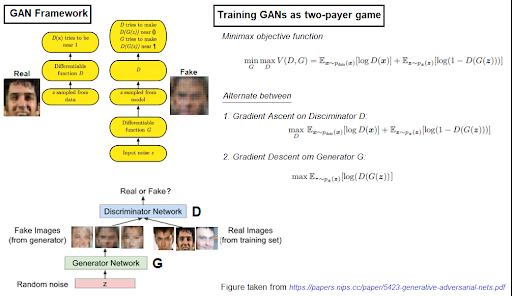

Prikazaćemo kako trenirati GAN pomoću *PyTorch*-a za generisanje realističnih fotografija lica, s obzirom na skup stvarnih fotografija lica. Budući da će verovatno biti potrebno dosta vremena da se obuči GAN, preporučuje se korišćenje GPU-a za obuku GAN-a.

- Generator (mreža) generiše nove instance fotografije, dok ih diskriminator procenjuje na autentičnost.

- Sporni trening fokusira se na slabosti sistema, prisiljavajući se da se vremenom poboljšavaju (generator postaje bolji u stvaranju realističnih fotografija, a diskriminator u razlikovanju stvarnih od lažnih fotografija), sve dok lažne fotografije koje generiše ne postanu neprimetne od stvarnih fotografija i diskriminator ih ne može razlikovati (u ovom trenutku generator je naučio kako da generiše dobru fotografiju).

- Diskriminator je samo binarni klasifikator koji kao ulaz dobija dve serije fotografija (iz stvarnih podataka o obuci i iz generatora) i utvrđuje da li je fotografija stvarna ili lažna.

- Diskriminator optimizuje funkciju gubitka, koja se sastoji od zbira stvarnih i lažnih gubitaka, implementiranih od strane funkcija *real_loss()* i *fake_loss()*.

- Generator optimizuje stvarni gubitak da bi zavarao diskriminator čineći da generisana fotografija sve više liči na stvarne fotografije (počevši od *random* šuma).

- Funkcija *build_GAN()* je implementirana za kreiranje i inicijalizaciju diskriminatornih i generatorskih mreža.

In [ ]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

import keras
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, Reshape, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Conv2DTranspose

from tensorflow.compat.v1.keras.layers import BatchNormalization


In [ ]:
# Funkcija koja vraća set validnih formata fotografija
def list_images(basePath, contains=None):
    return list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=contains)

# Funkcija za prolaz kroz fajlove
def list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=None):
    # petlja preko strukture direktorijuma
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # petlja preko imena datoteka u trenutnom direktorijumu
        for filename in filenames:
            # ignorisanje fajla ukoliko contains nije none i ukoliko ne sadrži dati string
            if contains is not None and filename.find(contains) == -1:
                continue

            # odredite ekstenziju trenutne datoteke
            ext = filename[filename.rfind("."):].lower()

            # proverite da li je datoteka fotografija i treba li je obraditi
            if ext.endswith(validExts):
                # konstruisati put do fotografije 
                imagePath = os.path.join(rootDir, filename).replace(" ", "\\ ")
                yield imagePath

# Funkcija za učitavanje fotografija 
def load_images(directory='', size=(64,64)):
    images = []
    labels = []  # int brojevi koji odgovaraju kategorijama po abecednom redu
    label = 0
    
    imagePaths = list(list_images(directory))
    
    for path in imagePaths:
        
        if not('OSX' in path):
        
            path = path.replace('\\','/')

            # Učitavanje fotografije i promena veličine (za slučaj da nisu sve iste veličine)
            image = cv2.imread(path) 
            image = cv2.resize(image,size) 

            images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    return images

In [ ]:
images=load_images('./images/anime')

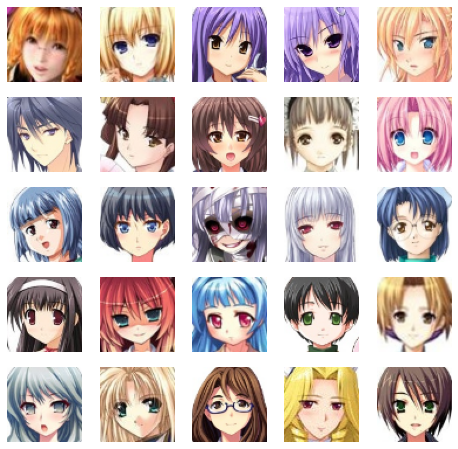

In [ ]:
_,ax = plt.subplots(5,5, figsize = (8,8)) 
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(images[5*i+j])
        ax[i,j].axis('off')

In [ ]:
# Definisanje GAN klase

class GAN():
    def __init__(self):
        self.img_shape = (64, 64, 3)
        
        self.noise_size = 100

        optimizer = Adam(0.0002,0.5)

        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', 
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        self.generator = self.build_generator()
        self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined = Sequential()
        self.combined.add(self.generator)
        self.combined.add(self.discriminator)
        
        self.discriminator.trainable = False
        
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined.summary()
        
    # Kreiranje generatora - velika jezgra u konvolucionim slojevima omogućavaju mreži da stvara složene strukture
    def build_generator(self):
        epsilon = 0.00001 # Decimala je dodata varijansi kako bi se izbeglo deljenje sa nulom u slojevima BatchNorm.
        noise_shape = (self.noise_size,)
        
        model = Sequential()
        
        model.add(Dense(4*4*512, activation='linear', input_shape=noise_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Reshape((4, 4, 512)))
        
        model.add(Conv2DTranspose(512, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(256, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(128, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(64, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(3, kernel_size=[4,4], strides=[1,1], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))

        # Standardno aktiviranje za generator GAN-a
        model.add(Activation("tanh"))
        
        model.summary()

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)

    # Kreiranje diskriminatora
    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(128, (3,3), padding='same', input_shape=self.img_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.2))

        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        
        model.summary()
        
        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    # Funkcija za trening
    def train(self, epochs, batch_size=128, metrics_update=50, save_images=100, save_model=2000):

        X_train = np.array(images)
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5

        half_batch = int(batch_size / 2)
        
        mean_d_loss=[0,0]
        mean_g_loss=0

        for epoch in range(epochs):
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (half_batch, self.noise_size))
            gen_imgs = self.generator.predict(noise)

            # Trening diskriminatora
            # Gubitak diskriminatora je srednja vrednost gubitaka tokom treninga na autentičnim i lažnim fotografijama
            d_loss = 0.5 * np.add(self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1))),
                                  self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1))))

            # Trening generatora
            noise = np.random.normal(0, 1, (batch_size, self.noise_size))

            valid_y = np.array([1] * batch_size)
            g_loss = self.combined.train_on_batch(noise, valid_y)
            
            mean_d_loss[0] += d_loss[0]
            mean_d_loss[1] += d_loss[1]
            mean_g_loss += g_loss

            """
            Gubitke i tačnost mreža ispisujemo svakih 200 serija uglavnom da bismo bili sigurni da tačnost diskriminatora 
            nije stabilna na oko 50% ili 100% (što bi značilo da diskriminator ne radi dovoljno dobro ili previše dobro)
            """
            if epoch % metrics_update == 0:
                print ("%d [Discriminator loss: %f, acc.: %.2f%%] [Generator loss: %f]" % (epoch, mean_d_loss[0]/metrics_update, 100*mean_d_loss[1]/metrics_update, mean_g_loss/metrics_update))
                mean_d_loss=[0,0]
                mean_g_loss=0
            
            # Čuvanje 25 fotografija
            if epoch % save_images == 0:
                self.save_images(epoch)
            
            # Čuvamo arhitekturu modela, težine i stanje optimizatora
            # Na ovaj način možemo ponovo pokrenuti trening tačno tamo gde smo stali
            if epoch % save_model == 0:
                self.generator.save("generator_%d" % epoch)
                self.discriminator.save("discriminator_%d" % epoch)

    # Čuvanje 25 generisanih fotografija kako bi se prikazao spektar fotografija kreiranih od strane generatora
    def save_images(self, epoch):
        noise = np.random.normal(0, 1, (25, self.noise_size))
        gen_imgs = self.generator.predict(noise)
        
        # Rescale from [-1,1] into [0,1]
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5,5, figsize = (8,8))

        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[5*i+j])
                axs[i,j].axis('off')

        plt.show()
        
        fig.savefig("animeGenerated/Faces_%d.png" % epoch)
        plt.close()

In [ ]:
!mkdir animeGenerated

In [ ]:
#Referenca https://www.kaggle.com/nassimyagoub/gan-anime-faces

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 64, 64, 128)       3584      
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 64, 64, 128)       0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 64, 64, 128)       512       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 64, 64, 128)       0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 21, 21, 128)     

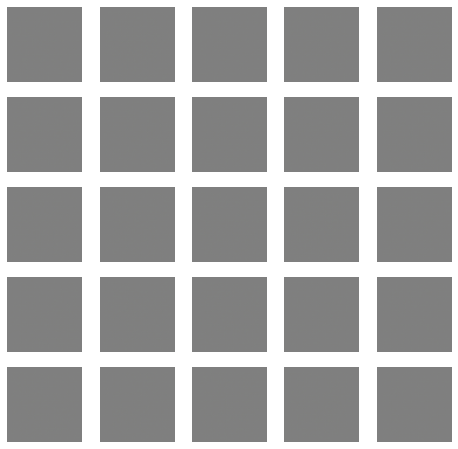

INFO:tensorflow:Assets written to: generator_0/assets
INFO:tensorflow:Assets written to: discriminator_0/assets
200 [Discriminator loss: 0.323985, acc.: 87.29%] [Generator loss: 2.839679]
400 [Discriminator loss: 0.333789, acc.: 86.31%] [Generator loss: 3.338504]
600 [Discriminator loss: 0.339484, acc.: 85.78%] [Generator loss: 3.966107]
800 [Discriminator loss: 0.285237, acc.: 88.92%] [Generator loss: 3.905305]
1000 [Discriminator loss: 0.270952, acc.: 89.37%] [Generator loss: 4.218472]


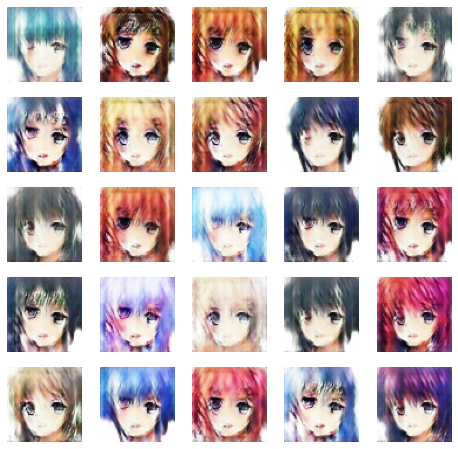

1200 [Discriminator loss: 0.298012, acc.: 88.29%] [Generator loss: 4.230829]
1400 [Discriminator loss: 0.254747, acc.: 90.26%] [Generator loss: 4.332588]


In [ ]:
# Instanciranje GAN klase i treniranje modela

gan=GAN()
gan.train(epochs=1500, batch_size=256, metrics_update=200, save_images=300, save_model=1500)

### Restricted Boltzmann Machine for Image Generation // Korišćenje ograničene *Boltzmannove* mašine za rekonstrukciju *Bangla* MNIST fotografija

Ograničena Boltzmannova mašina (RBM) je model bez nadzora. Kao neusmereni grafički model sa dva sloja (posmatrani i skriveni), korisno je naučiti različitu predstavu ulaznih podataka zajedno sa skrivenim slojem. Ovo je bio prvi strukturni blok dubokog učenja, posebno kada računski resursi za učenje o dubokoj neuronskoj mreži sa povratnim širenjem nisu bili dostupni (umesto toga je korišćen složeni RBM).

Ograničava povezanost mreže (omogućava samo dvodelni graf između skrivenog i posmatranog skupa čvorova) da bi olakšao zaključivanje. To je model zasnovan na energiji; zajednička raspodela modelira se pomoću funkcije energije. Da bismo zaključili o najverovatnijem posmatranju, treba da izaberemo ono sa najmanje energije. 

Ovaj model se uglavnom obučava na binarnim fotografijama. Izračunavanje zajedničke raspodele posmatranih i skrivenih slojeva je nerešivo (jer je particijsku funkciju, Z, teško izračunati), iako je uslovnu raspodelu lako izračunati i iz nje napraviti uzorak (pošto se puna uslovna raspodela faktorizira). 

Algoritam kontrastne divergencije (CD - *contrastive divergence*) koristi se za obuku RBM-a i minimiziranje prosečne verovatnoće negativnog dnevnika. Za svaki primer treninga, *x(t)*, generiše se negativni uzorak korišćenjem *k* koraka *Gibbs*-ovog uzorkovanja, počevši od *x(t)* sa algoritmom kstep kontrastivne divergencije (CD-k).

Potrebno je dobiti procene tačaka koristeći *Gibbs* uzorkovanje i naknadno ažurirati parametre *W*, *b* i *c*. 

Osnovna matematika prikazana je na sledećem dijagramu:


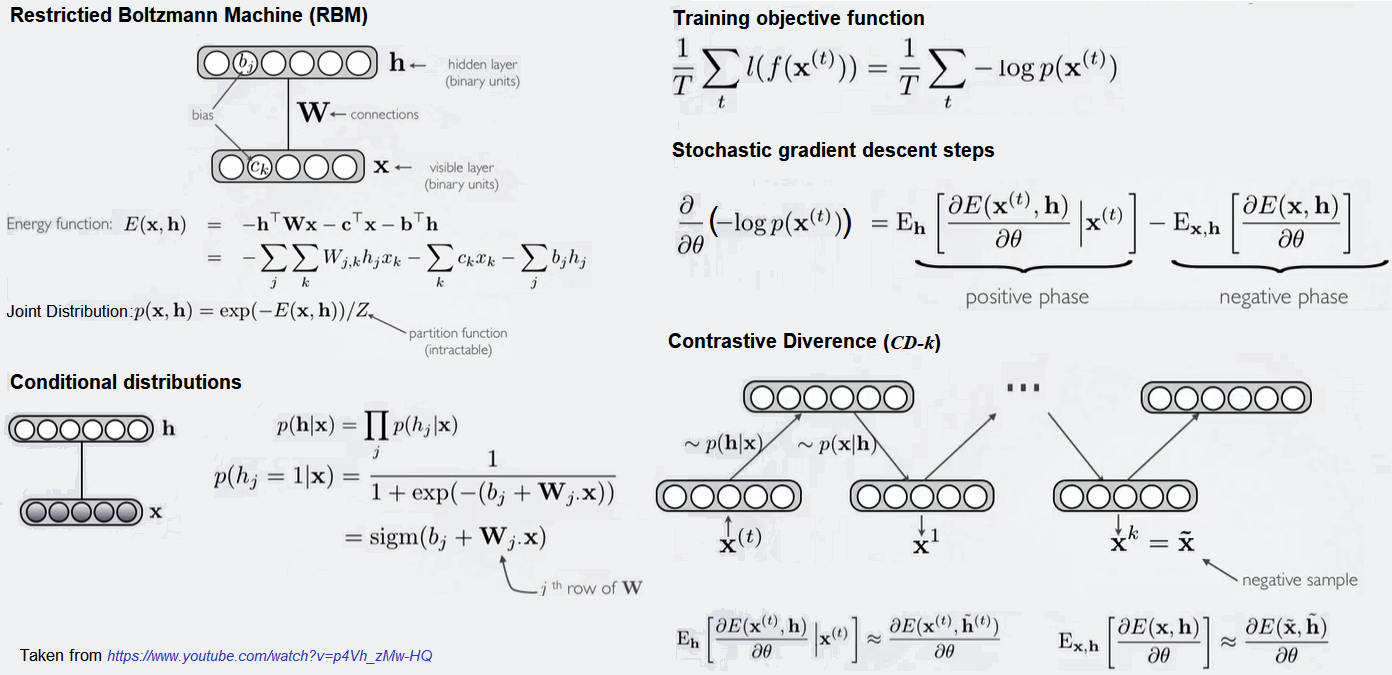

#### Bangla MNIST Dataset (Numta)

Koristićemo *Numta* skup podataka (bengalski ručno pisani skup cifara) za primenu RBM-a i generisanje cifara iz skrivenih prikaza pomoću *PyTorch*-a.

In [ ]:
# download the numta dataset from here: https://www.kaggle.com/BengaliAI/numta/version/4
# extract training-e.zip and testing-e.zip inside the images/Numta folder
# folder structure:
# images/Numta
#     --- training-e
#     --- testing-e
#     --- training-e.csv
import os
from glob import glob
import pandas as pd
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import make_grid , save_image
from torch.utils.data import DataLoader
from skimage.color import rgb2gray
from cv2 import resize

In [ ]:
# Učitavanja fotografija za trening i testiranje

n = 28
df = pd.read_csv('images/Numta/training-e.csv')

X_train = np.zeros((df.shape[0], n*n))

for i in range(df.shape[0]): 
    img = rgb2gray(imread('images/Numta/training-e/' + df.iloc[i]['filename'])) 
    img = resize(img, (n,n))
    if i % 1000 == 0: print(i) 
    X_train[i,:] = np.array([np.ravel(img)])

test_images = glob('images/Numta/testing-e/*.png')
print(len(test_images))

X_test = np.zeros((len(test_images), n*n))

for i in range(len(test_images)): 
    img = rgb2gray(imread(test_images[i])) 
    img = resize(img, (n,n))
    X_test[i,:] = np.array([np.ravel(img)])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
2970


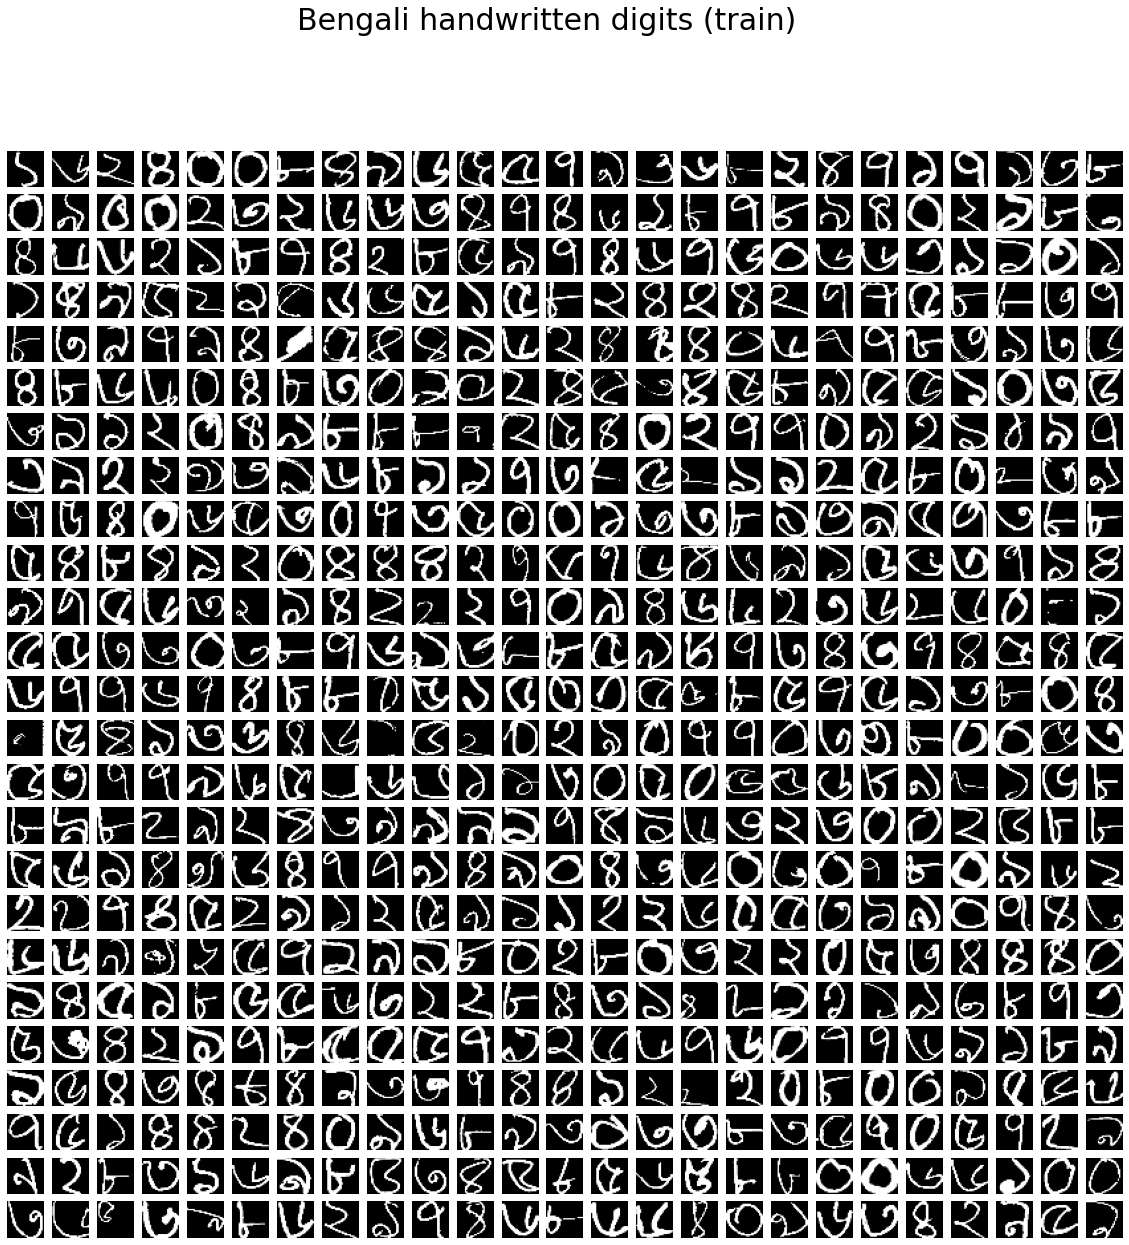

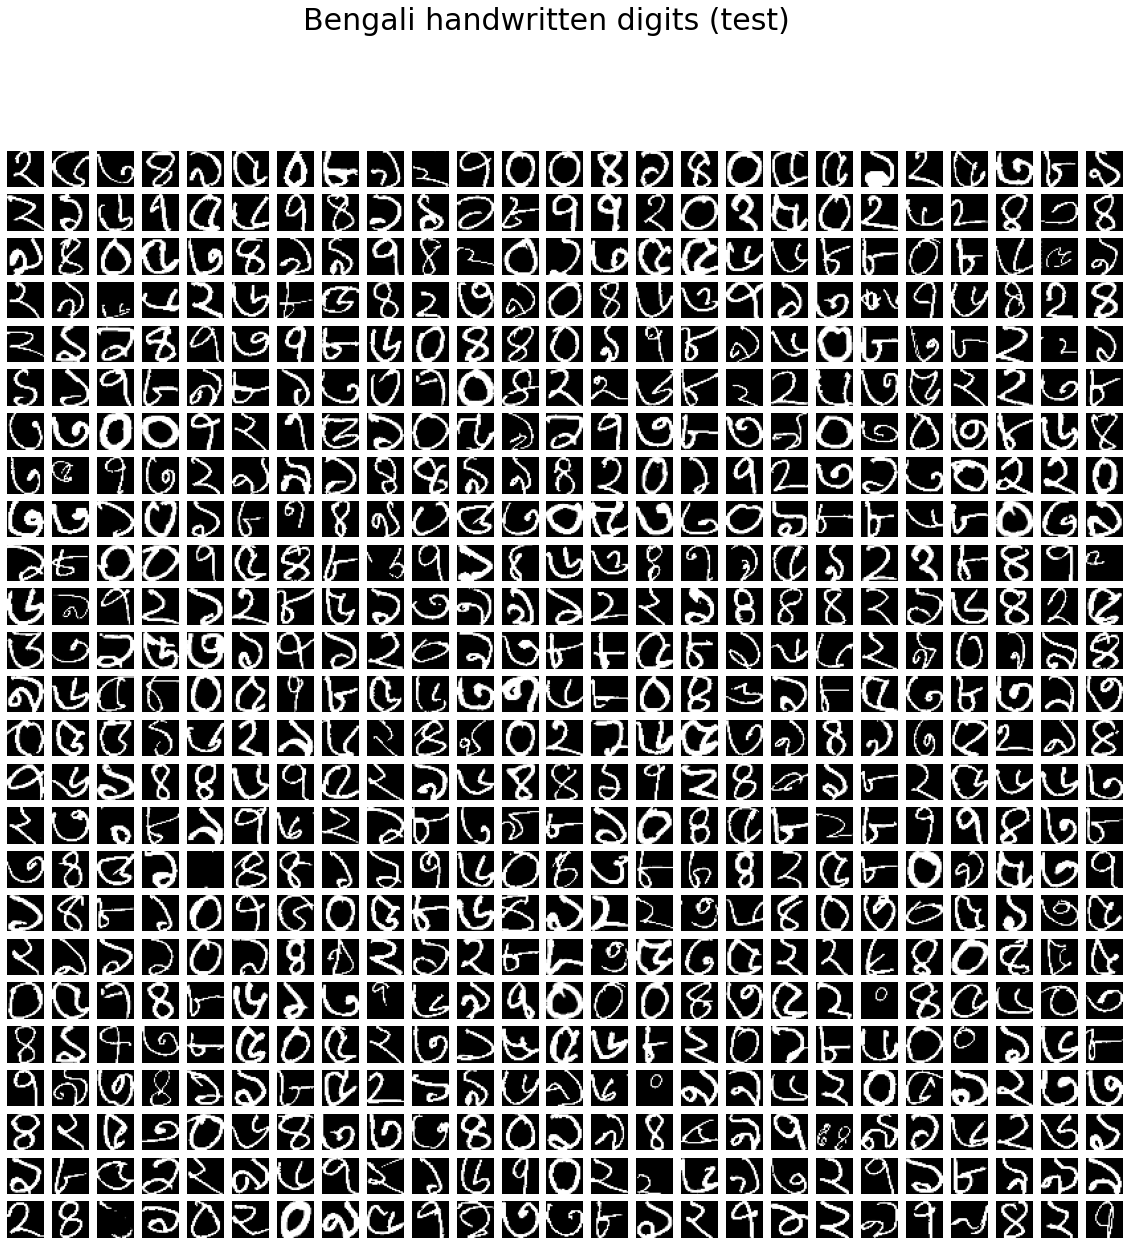

In [ ]:
# Prikaz nekoliko nasumično izabranih fotografija iz skupa podataka za trening
indices = np.random.choice(range(X_train.shape[0]), 625)
plt.figure(figsize=(20,20))
plt.gray()
for i in range(625):
    img = np.reshape(X_train[indices[i],:], (n,n))
    plt.subplot(25,25,i+1)
    plt.imshow(255*img)
    plt.axis('off')
plt.suptitle('Bengali handwritten digits (train)', size=30)
plt.savefig('digits_viz_train.png')

# Prikaz nekoliko nasumično izabranih fotografija iz skupa podataka za testiranje
plt.figure(figsize=(20,20))
plt.gray()
indices = np.random.choice(range(X_test.shape[0]), 625)
for i in range(625):
    img = np.reshape(X_test[indices[i],:], (n,n))
    plt.subplot(25,25,i+1)
    plt.imshow(255*img)
    plt.axis('off')
plt.suptitle('Bengali handwritten digits (test)', size=30)
plt.savefig('digits_viz_test.png')
plt.show()

Pogledati primer


*   [Applying deep learning and a RBM to MNIST using Python](https://www.pyimagesearch.com/2014/06/23/applying-deep-learning-rbm-mnist-using-python/)



![](https://github.com/PacktPublishing/Python-Image-Processing-Cookbook/blob/master/Chapter%2009/images/rbm_model.png?raw=1)

## Korisni linkovi

1.   [Fun with Tensorflow - im2txt](https://edouardfouche.com/Fun-with-Tensorflow-im2txt/)

2.   [Show and Tell: Lessons learned from the 2015 MSCOCO Image Captioning Challenge](https://arxiv.org/pdf/1609.06647.pdf)

3.   [Generative Adversarial Nets](https://arxiv.org/pdf/1406.2661.pdf)

4.   [A Practical Guide to Training Restricted Boltzmann Machines](https://www.cs.toronto.edu/~hinton/absps/guideTR.pdf)




## Reference

1.   [Python Image Processing Cookbook](https://www.amazon.com/Python-Image-Processing-Cookbook-processing-ebook/dp/B084ZN7Y5F), Sandipan Dey




## TO DO

### Zadatak 1

Na osnovu *dataset*-a ljudskih lica, koji možete preuzeti na linku: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html , potrebno je izvršiti generisanje fotografija ljudskih lica pomoću GAN-a.

